<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Neural_Networks/Visualization_of_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests, io

from tensorflow import keras

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = X_train.reshape(-1,32*32)
X_train = X_train.T


X_train = scaler.fit_transform(X_train)

X_train = X_train.T

X_train = X_train.reshape(-1,32,32)


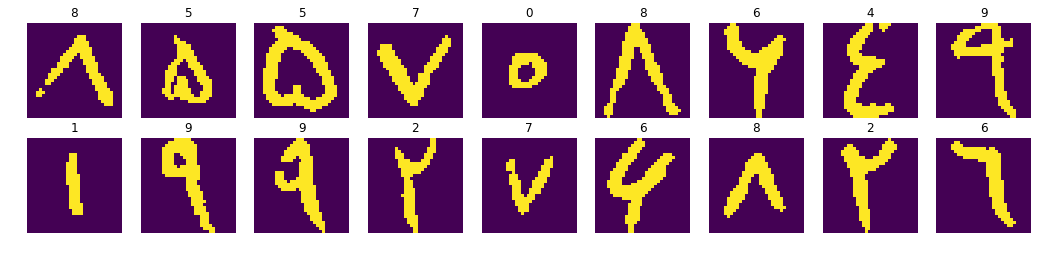

In [4]:
fig = plt.figure(figsize=(18,6))
for i in range(18):
  ax = fig.add_subplot(3,9,i+1, title=y_train[i])
  ax.imshow(X_train[i])
  ax.axis('off')

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=4, kernel_size=7, activation='relu', input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(125, activation='relu'),
    keras.layers.Dense(56, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


implementing the neural network with partial function

In [0]:
from functools import partial

conv = partial(keras.layers.Conv2D, kernel_size=3, strides=1, activation='relu', padding="SAME" )
pool = partial(keras.layers.MaxPooling2D, pool_size=2)
Dense = partial(keras.layers.Dense,activation='relu')

model = keras.models.Sequential([
    conv(filters=1, kernel_size=7, input_shape=(32,32,1)),
    pool(),
    conv(filters=2),
    pool(),
    conv(filters=3),
    keras.layers.Flatten(),
    Dense(units=125),
    Dense(units=56),
    Dense(units=10, activation='softmax')   ,
])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 1)         50        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 2)         20        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 2)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 3)           57        
_________________________________________________________________
flatten_2 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 125)               24125     
__________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [54]:
history = model.fit(X_train.reshape(-1,32,32,1), y_train, epochs=5, batch_size=1024,validation_split=0.2)

Train on 61411 samples, validate on 15353 samples
Epoch 1/5
61411/61411 [==============================] - 69s 1ms/sample - loss: 0.1826 - acc: 0.9431 - val_loss: 0.1570 - val_acc: 0.9533
Epoch 2/5
61411/61411 [==============================] - 70s 1ms/sample - loss: 0.1283 - acc: 0.9607 - val_loss: 0.1247 - val_acc: 0.9622
Epoch 3/5
61411/61411 [==============================] - 70s 1ms/sample - loss: 0.1040 - acc: 0.9681 - val_loss: 0.1089 - val_acc: 0.9665
Epoch 4/5
61411/61411 [==============================] - 70s 1ms/sample - loss: 0.0866 - acc: 0.9731 - val_loss: 0.0920 - val_acc: 0.9731
Epoch 5/5
61411/61411 [==============================] - 70s 1ms/sample - loss: 0.0749 - acc: 0.9768 - val_loss: 0.0833 - val_acc: 0.9744


In [0]:
vis_layers = [l.output for l in model.layers ]

vis_model = keras.models.Model( inputs = model.input, outputs=vis_layers)

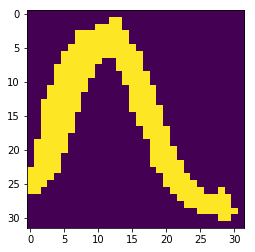

In [69]:
ind = np.random.randint(len(X_test))

img = X_test[ind]
plt.imshow(img)


In [0]:
pred = vis_model.predict([[img.reshape(32,32,1)]])

In [71]:
layer=0
pred[layer].shape

(1, 32, 32, 1)

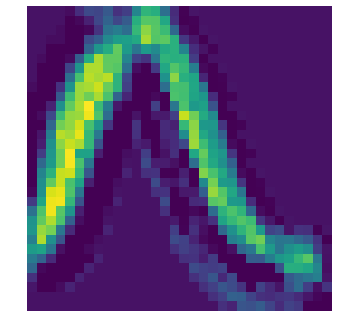

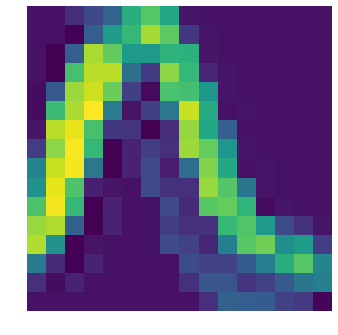

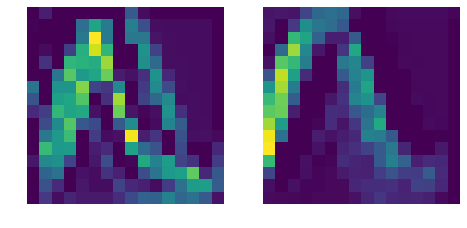

In [73]:


for layer in range(3):
  fig = plt.figure(figsize=(12,6))
  for i in range( pred[layer].shape[-1] ):
    ax = fig.add_subplot(1,int(pred[layer].shape[-1])+1,i+1)

    ax.imshow(pred[layer][0, :, :, i])
    ax.axis('off')